In [17]:
# Library standar untuk membaca file CSV
import csv

# Library untuk visualisasi grafik
import matplotlib.pyplot as plt

# Library untuk operasi numerik dan pembuatan array
import numpy as np

In [18]:
# Fungsi keanggotaan segitiga
# x  : nilai input
# a  : batas kiri
# b  : titik puncak
# c  : batas kanan
def triangular(x, a, b, c):
    if x <= a or x >= c:
        return 0.0
    elif a < x <= b:
        return (x - a) / (b - a)
    else:
        return (c - x) / (c - b)

In [19]:
# Fuzzifikasi variabel harga
# Mengubah nilai harga menjadi derajat keanggotaan
def fuzzify_harga(x):
    return {
        'murah': triangular(x, 0, 0, 50),
        'sedang': triangular(x, 30, 50, 70),
        'mahal': triangular(x, 50, 100, 100)
    }

In [20]:
# Fuzzifikasi variabel performa
def fuzzify_performa(x):
    return {
        'rendah': triangular(x, 0, 0, 50),
        'sedang': triangular(x, 30, 50, 70),
        'tinggi': triangular(x, 50, 100, 100)
    }

In [21]:
# Daftar aturan inferensi fuzzy
# Format: (Harga, Performa, Output Kelayakan)
rules = [
    ('mahal', 'rendah', 'low'),
    ('mahal', 'sedang', 'low'),
    ('mahal', 'tinggi', 'medium'),
    ('sedang', 'rendah', 'low'),
    ('sedang', 'sedang', 'medium'),
    ('sedang', 'tinggi', 'high'),
    ('murah', 'rendah', 'medium'),
    ('murah', 'sedang', 'high'),
    ('murah', 'tinggi', 'high')
]

In [22]:
# Representasi numerik untuk output kelayakan
output_value = {
    'low': 40,
    'medium': 70,
    'high': 90
}

In [23]:
# Perhitungan skor menggunakan metode Mamdani
def mamdani(harga, performa):
    h = fuzzify_harga(harga)
    p = fuzzify_performa(performa)

    numerator = 0
    denominator = 0

    # Proses inferensi menggunakan operator MIN
    for r in rules:
        alpha = min(h[r[0]], p[r[1]])
        z = output_value[r[2]]
        numerator += alpha * z
        denominator += alpha

    # Defuzzifikasi menggunakan metode centroid
    return numerator / denominator if denominator != 0 else 0

In [24]:
# Perhitungan skor menggunakan metode Sugeno
def sugeno(harga, performa):
    h = fuzzify_harga(harga)
    p = fuzzify_performa(performa)

    numerator = 0
    denominator = 0

    # Proses inferensi dan defuzzifikasi weighted average
    for r in rules:
        alpha = min(h[r[0]], p[r[1]])
        z = output_value[r[2]]
        numerator += alpha * z
        denominator += alpha

    return numerator / denominator if denominator != 0 else 0

In [25]:
# List untuk menyimpan hasil perhitungan
hasil = []

# Membaca file dataset laptop
with open('laptop.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        harga = float(row['harga'])
        performa = float(row['performa'])

        # Hitung skor Mamdani dan Sugeno
        skor_mamdani = mamdani(harga, performa)
        skor_sugeno = sugeno(harga, performa)

        # Simpan hasil ke dalam list
        hasil.append({
            'id': row['id_laptop'],
            'harga': harga,
            'performa': performa,
            'mamdani': round(skor_mamdani, 2),
            'sugeno': round(skor_sugeno, 2)
        })

In [27]:
print("5 Laptop Terbaik Berdasarkan Sistem Fuzzy\n")
print("ID Laptop | Harga | Performa | Mamdani | Sugeno")
print("-" * 60)

for l in top5:
    print(f"{l['id']:9} | "
          f"{l['harga']:5.0f} | "
          f"{l['performa']:8.0f} | "
          f"{l['mamdani']:7.2f} | "
          f"{l['sugeno']:6.2f}")

5 Laptop Terbaik Berdasarkan Sistem Fuzzy

ID Laptop | Harga | Performa | Mamdani | Sugeno
------------------------------------------------------------
L05       |    50 |       70 |   90.00 |  90.00
L06       |    30 |       55 |   90.00 |  90.00
L02       |    60 |       75 |   84.29 |  84.29
L11       |    35 |       58 |   84.25 |  84.25
L08       |    45 |       65 |   83.33 |  83.33


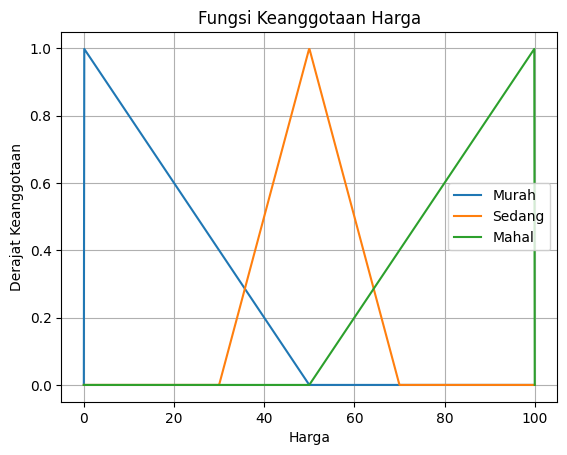

In [28]:
# Membuat range nilai input
x = np.linspace(0, 100, 1000)

# Plot fungsi keanggotaan harga
plt.figure()
plt.plot(x, [triangular(i,0,0,50) for i in x], label='Murah')
plt.plot(x, [triangular(i,30,50,70) for i in x], label='Sedang')
plt.plot(x, [triangular(i,50,100,100) for i in x], label='Mahal')
plt.title('Fungsi Keanggotaan Harga')
plt.xlabel('Harga')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

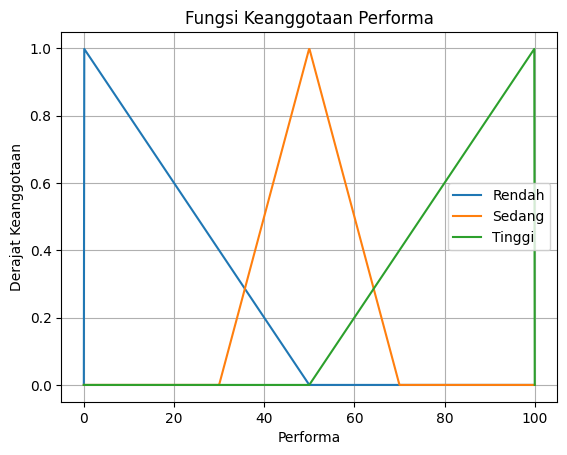

In [31]:
# ================================
# VISUALISASI FUNGSI KEANGGOTAAN PERFORMA
# ================================

# Range nilai performa (0 - 100)
x = np.linspace(0, 100, 1000)

# Hitung derajat keanggotaan performa
rendah = [triangular(i, 0, 0, 50) for i in x]
sedang = [triangular(i, 30, 50, 70) for i in x]
tinggi = [triangular(i, 50, 100, 100) for i in x]

# Plot grafik fungsi keanggotaan performa
plt.figure()
plt.plot(x, rendah, label='Rendah')
plt.plot(x, sedang, label='Sedang')
plt.plot(x, tinggi, label='Tinggi')
plt.title('Fungsi Keanggotaan Performa')
plt.xlabel('Performa')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

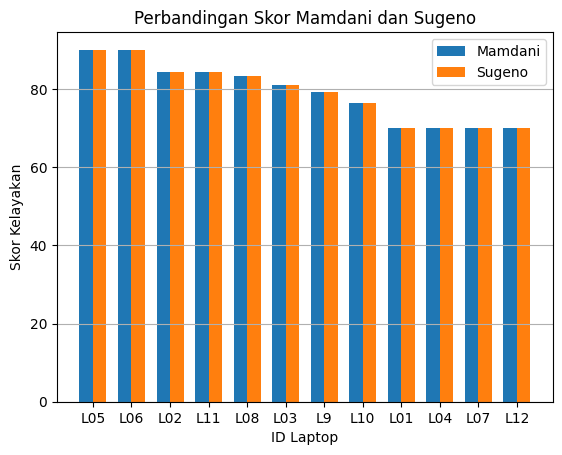

In [32]:
labels = [l['id'] for l in hasil]
mamdani_scores = [l['mamdani'] for l in hasil]
sugeno_scores = [l['sugeno'] for l in hasil]

x_pos = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x_pos - width/2, mamdani_scores, width, label='Mamdani')
plt.bar(x_pos + width/2, sugeno_scores, width, label='Sugeno')
plt.xticks(x_pos, labels)
plt.xlabel('ID Laptop')
plt.ylabel('Skor Kelayakan')
plt.title('Perbandingan Skor Mamdani dan Sugeno')
plt.legend()
plt.grid(axis='y')
plt.show()